# Homework 4


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Q1
If the linear equation have a non-zeros solution, then the determinant of the matrix is zero.


In [18]:
l = symbols('lambda')
M = Matrix([[l-2, -3, -2],[-1, l-8, -2],[2, 14, l+3]])
pprint(factor(det(M)))

       2        
(λ - 3) ⋅(λ - 1)


If $\lambda$=3 or 1 the determinant of the matrix is zeros.

## Q2
No

In [19]:
A = np.array([[1,1],[-1,-1]])
B = np.array([[2,2],[-2,-2]])
print(A@A)
print(B@B)

[[0 0]
 [0 0]]
[[0 0]
 [0 0]]


## Q3

2.8
4.0
1.2


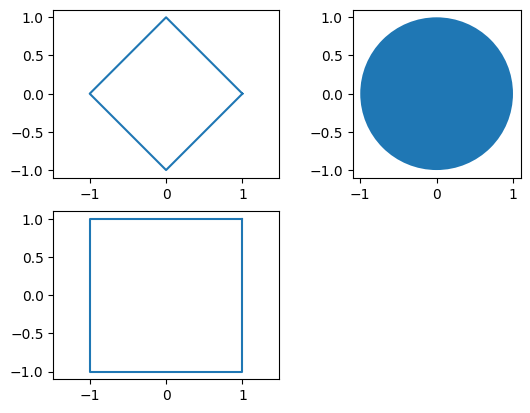

In [20]:
fig=plt.figure()
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
x = [1,0,-1,0,1]
y = [0,1,0,-1,0]
ax1.plot(x,y)
ax1.axis('equal')
c = plt.Circle(xy=(0,0),radius=1)
ax2.add_patch(c)
ax2.axis('scaled')
x = [1,-1,-1,1,1]
y = [1,1,-1,-1,1]
ax3.plot(x,y)
ax3.axis('equal')

x = np.array([-1.6,1.2])
print(sum(abs(x)))
print(x.T@x)
print(abs(np.max(x)))

## Q4
The matrix isn't ill conditioned

Cond(A)=1.4142135623730954


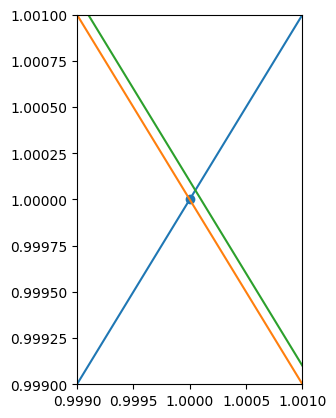

In [21]:
x_ = np.linspace(-1,1,100)
y1= x
y2 = 2-x
y3 = 2.0001-x
fig = plt.figure()
ax1 = plt.subplot(121)
ax1.plot(x,y1)
ax1.plot(x,y2)
ax1.plot(x,y3)
ax1.set_xlim(0.999,1.001)
ax1.set_ylim(0.999,1.001)
ax1.scatter(1,1)
A = np.array([[1,-1],[1,1]])
cond = np.linalg.norm(A,ord=2)
print('Cond(A)={}'.format(cond))

## Q5

In [22]:
def PLU_Dec(M):
    n = np.size(M,0)
    L = np.eye(n)
    U = np.copy(M)
    p = np.arange(n)
    for i in range(n-1):
        largest_pivot = np.argmax(U[i:n,i])+i
        c = p[i]
        p[i]=p[largest_pivot]
        p[largest_pivot]=c
        C = np.copy(U[i,:])
        U[i,:] = U[largest_pivot,:]
        U[largest_pivot,:] = C
        for j in range(i+1,n):
            mult = U[j,i]/U[i,i]
            L[j,i] = mult
            U[j,:] = U[j,:]-mult*U[i,:]
    P = np.zeros([n,n])
    for i in range(n):
        P[i,p[i]] = 1
    
    return P,L,U


def LU_Dec(M):
    n = np.size(M,0)
    L = np.eye(n)
    U = np.copy(M)
    for i in range(n-1):
        for j in range(i+1,n):
            mult = U[j,i]/U[i,i]
            L[j,i] = mult
            U[j,:] = U[j,:]-mult*U[i,:]
    return L,U



A = np.array([[1,2,3],
              [2,4,5],
              [3,5,6]],dtype='float64')
P,L,U = PLU_Dec(A)
print('P = {}\nL = {}\nU = {}'.format(P,L,U))

A = np.array([[2,1,1,2],
              [2,2,2,3],
              [4,2,4,3],
              [0,0,6,-1]],dtype='float64')
P,L,U = PLU_Dec(A)
print('P = {}\nL = {}\nU = {}'.format(P,L,U))

P = [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L = [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.5        1.        ]]
U = [[3.         5.         6.        ]
 [0.         0.66666667 1.        ]
 [0.         0.         0.5       ]]
P = [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
L = [[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.5         0.          1.          0.        ]
 [ 0.          0.         -0.16666667  1.        ]]
U = [[ 4.          2.          4.          3.        ]
 [ 0.          1.          0.          1.5       ]
 [ 0.          0.          6.         -1.        ]
 [ 0.          0.          0.          0.33333333]]


## Q6


In [23]:
def LU_Solve(L,U,x,P=None):
    ## PTPAx = Ax = PTb
    if P is not None:
        B = P.T@np.copy(b)
    else:
        B = np.copy(b)
    n = np.size(L,0)
    Y = np.zeros([n,1])
    Y[0] = B[0]
    for i in range(1,n):
        Y[i] = B[i]-L[i,0:i]@Y[0:i]
    
    X = np.zeros([n,1])
    Y_ = np.copy(Y)
    X[n-1] = Y_[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        X[i] = (Y_[i]-U[i,i+1:n]@X[i+1:n])/U[i,i]

    return Y, X



A = np.array([[10,-7       ,0,1],
              [-3,2.099999 ,6,2],
              [5 ,-1       ,5,-1],
              [2 ,1        ,0,2]],dtype='float64')
b = np.array([ 8 ,5.900001 ,5,1] ,dtype='float64').T

P,L,U = PLU_Dec(A)
Y,X = LU_Solve(L,U,b,P)
print('Y={}\nX={}\nPLUX={}'.format(Y,X,P@L@U@X))
L,U = LU_Dec(A)
Y,X = LU_Solve(L,U,b)
print('Y={}\nX={}\nLUX={}'.format(Y,X,L@U@X))


Y=[[ 8.        ]
 [ 7.4       ]
 [ 1.90000396]
 [-6.18399734]]
X=[[ 1.38582661]
 [ 0.66299193]
 [ 0.78330726]
 [-1.21732257]]
PLUX=[[8.      ]
 [5.900001]
 [5.      ]
 [1.      ]]
Y=[[8.00000000e+00]
 [8.30000100e+00]
 [2.07500035e+07]
 [5.07999891e+00]]
X=[[-6.03391825e-10]
 [-1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]]
LUX=[[8.      ]
 [5.900001]
 [5.      ]
 [1.      ]]


## Q7
The aim of the solution is to find a Ax = b, in which the max norm of x converges with the convergence criterion.

In [24]:
epsillon = 1
a = 0.5
n = 100
def get_Matrix(epsillon,a,n):
    h = 1.0/n
    D = np.eye(n)*(-2*epsillon-h)
    L = np.eye(n)*(epsillon)
    L[1:n,:] = L[0:n-1,:]
    L[0,:] = np.zeros(n)
    U = np.eye(n)*(epsillon+h)
    U[:,1:n] = U[:,0:n-1]
    U[:,0] = np.zeros(n)
    A = D+L+U
    B = np.ones(n)*a*h**2
    B[n-1]-=(epsillon+h)
    P = np.linspace(0,1,n)
    return A, B, P

A,B,P = get_Matrix(epsillon,a,n)
def Jacobian_Iter(A,B,P,delta,max_iter=10000):
    n = np.size(A,0)
    X = np.zeros(n)
    X_list = np.zeros([max_iter,n])
    iter_ = 0
    for i in range(max_iter):
        for j in range(n):
            c = A[j,0:j]@P[0:j].reshape([j,1])+A[j,j+1:n]@P[j+1:n].reshape([n-j-1,1])
            X[j] = (B[j]-c)/A[j,j]
    
        err = np.linalg.norm(X-P,ord=np.inf)
        relative_err = err/(np.linalg.norm(X,ord=np.inf)+1e-10)
        P = np.copy(X)
        X_list[i,:] = np.copy(X)
        if err<delta:
            iter_ = i
            break
    X_list = X_list[0:iter_,:]
    return X, X_list
jacobian_Y,jacobian_Y_list = Jacobian_Iter(A,B,P,delta=1e-6,max_iter=10000)

def Gaussian_Iter(A,B,P,delta=1e-6,max_iter=10000):
    n = np.size(A,0)
    X = np.zeros(n)
    X_list = np.zeros([max_iter,n])
    iter_ = 0
    for i in range(max_iter):
        new_P = np.copy(P)
        for j in range(n):
            c = A[j,0:j]@new_P[0:j].reshape([j,1])+A[j,j+1:n]@new_P[j+1:n].reshape([n-j-1,1])
            X[j] = (B[j]-c)/A[j,j]
            new_P[j] = X[j]
        err = np.linalg.norm(X-P,ord=np.inf)
        relative_err = err/(np.linalg.norm(X,ord=np.inf)+1e-10)
        P = np.copy(X)
        X_list[i,:] = np.copy(X)
        if err<delta:
            iter_ = i
            break
    X_list = X_list[0:iter_,:]
    return X, X_list
gaussian_Y,gaussian_Y_list = Gaussian_Iter(A,B,P,delta=1e-6,max_iter=10000)



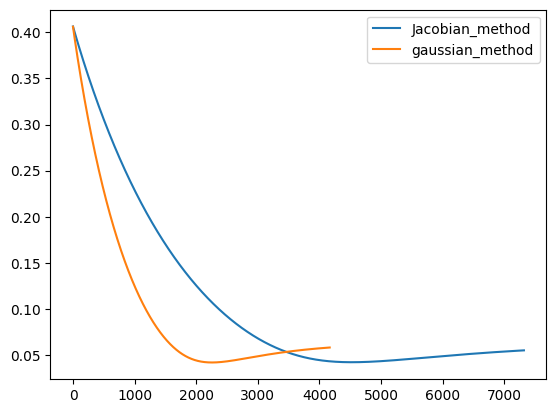

In [25]:
fig = plt.figure()
ax = fig.subplots()
x = np.arange(0,100)*1/n
analystic_Y= (1-a)/(1-np.exp(-1/epsillon))*(1-np.exp(-x/epsillon))+a*x
max_iter = np.size(jacobian_Y_list,0)
loss_y = np.zeros(max_iter)
for i in range(max_iter):
    loss_y[i] = np.linalg.norm(analystic_Y-jacobian_Y_list[i,:],ord=2)
idx = np.arange(max_iter)
ax.plot(idx,loss_y,label='Jacobian_method')
max_iter = np.size(gaussian_Y_list,0)
loss_y = np.zeros(max_iter)
for i in range(max_iter):
    loss_y[i] = np.linalg.norm(analystic_Y-gaussian_Y_list[i,:],ord=2)
idx = np.arange(max_iter)
ax.plot(idx,loss_y,label='gaussian_method')
ax.legend()


In [26]:
# epsillon = 0.1
epsillon = 0.1
A,B,P = get_Matrix(epsillon,a,n)
gaussian_Y1, gaussian_Y_list1 = Gaussian_Iter(A,B,P,delta=1e-6)
# epsillon = 0.01
epsillon = 0.01
A,B,P = get_Matrix(epsillon,a,n)
gaussian_Y2, gaussian_Y_list2 = Gaussian_Iter(A,B,P,delta=1e-6)
# epsillon = 0.001
epsillon = 0.001
A,B,P = get_Matrix(epsillon,a,n)
gaussian_Y3, gaussian_Y_list3 = Gaussian_Iter(A,B,P,delta=1e-6)

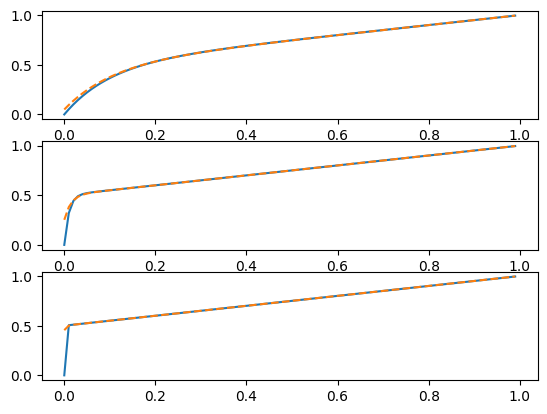

In [27]:
fig = plt.figure()
## epsillon=0.1
ax = plt.subplot(3,1,1)
x = np.arange(0,100)*1/n
epsillon = 0.1
analystic_Y= (1-a)/(1-np.exp(-1/epsillon))*(1-np.exp(-x/epsillon))+a*x
ax.plot(x,analystic_Y)
ax.plot(x,gaussian_Y1,'--')
## epsillon = 0.01
ax = plt.subplot(3,1,2)
epsillon = 0.01
analystic_Y= (1-a)/(1-np.exp(-1/epsillon))*(1-np.exp(-x/epsillon))+a*x
ax.plot(x,analystic_Y)
ax.plot(x,gaussian_Y2,'--')
## epsillon = 0.001
ax = plt.subplot(3,1,3)
epsillon = 0.001
analystic_Y= (1-a)/(1-np.exp(-1/epsillon))*(1-np.exp(-x/epsillon))+a*x
ax.plot(x,analystic_Y)
ax.plot(x,gaussian_Y3,'--')

